# Feature Selection 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from optbinning import BinningProcess
from optbinning import OptimalBinning


In [43]:
df = pd.read_csv("Copia de Dataset_vuelos.csv",nrows=5500)

In [44]:
drop_cols = ['FlightDate', 'ArrDelay', 'ArrDelayMinutes', 'AirTime']  
df = df.drop(columns=drop_cols)

In [45]:
# Oversampling manual de clase 1
df_0 = df[df['is_delay'] == 0]
df_1 = df[df['is_delay'] == 1]
df_1_oversampled = df_1.sample(n=len(df_0), replace=True, random_state=42)
df_balanced = pd.concat([df_0, df_1_oversampled]).sample(frac=1, random_state=42)


In [46]:
X = df_balanced.drop(columns=['is_delay'])
y = df_balanced['is_delay']

In [47]:
cat_cols = ['Origin', 'Dest', 'OriginState', 'DestState', 'Reporting_Airline']
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True, dtype=int)

## i. Heatmap de correlación

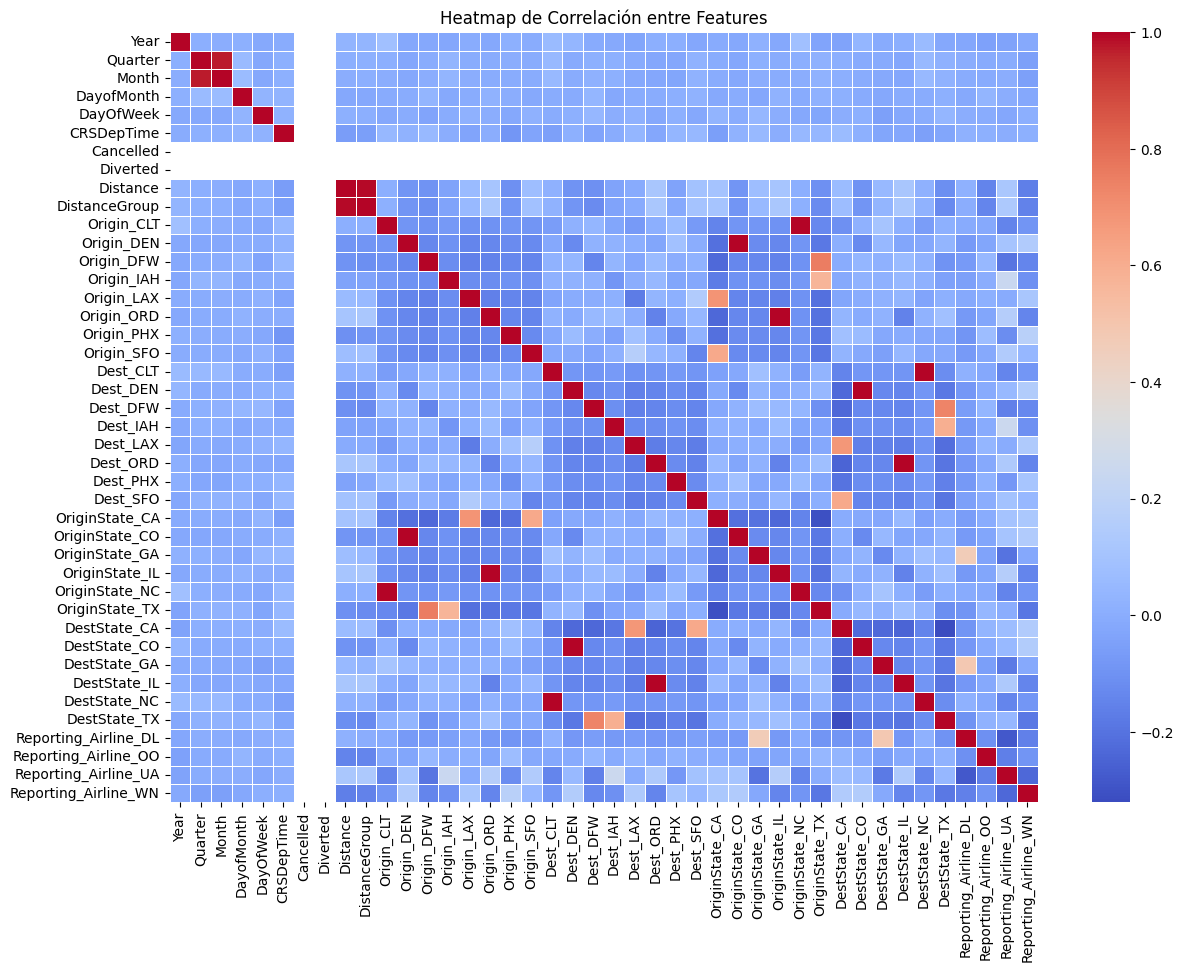

In [48]:
plt.figure(figsize=(14,10))
sns.heatmap(X_encoded.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap de Correlación entre Features")
plt.show()

## ii. Importancia por coeficientes

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

coef_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coeficiente': model.coef_[0],
    'Importancia_abs': np.abs(model.coef_[0])
}).sort_values(by='Importancia_abs', ascending=False)

print("\nTop 10 features más importantes por coeficiente:")
print(coef_df.head(10))


Top 10 features más importantes por coeficiente:
                 Feature  Coeficiente  Importancia_abs
28        OriginState_GA    -0.316853         0.316853
25              Dest_SFO     0.230795         0.230795
34          DestState_GA    -0.194287         0.194287
23              Dest_ORD     0.153713         0.153713
35          DestState_IL     0.153713         0.153713
40  Reporting_Airline_UA    -0.146535         0.146535
41  Reporting_Airline_WN     0.145372         0.145372
32          DestState_CA     0.132895         0.132895
24              Dest_PHX    -0.118851         0.118851
17            Origin_SFO     0.117986         0.117986


In [50]:
features = X_encoded.columns.tolist()
target = 'is_delay'

In [51]:
features = X_encoded.columns.tolist()
binning_process = BinningProcess(variable_names=features)
binning_process.fit(X_encoded, y)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

BinningProcess(variable_names=['Year', 'Quarter', 'Month', 'DayofMonth',
                               'DayOfWeek', 'CRSDepTime', 'Cancelled',
                               'Diverted', 'Distance', 'DistanceGroup',
                               'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
                               'Origin_IAH', 'Origin_LAX', 'Origin_ORD',
                               'Origin_PHX', 'Origin_SFO', 'Dest_CLT',
                               'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX',
                               'Dest_ORD', 'Dest_PHX', 'Dest_SFO',
                               'OriginState_CA', 'OriginState_CO',
                               'OriginState_GA', 'OriginState_IL', ...])

In [52]:
iv_summary = []
for var in features:
    binning_result = binning_process.get_binned_variable(var)
    binning_table = binning_result.binning_table.build()
    iv = binning_table.loc["Totals", "IV"]  
    iv_summary.append((var, iv))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

## iii. IV Values

In [53]:
# Mostrar IV ordenado
iv_df = pd.DataFrame(iv_summary, columns=["Feature", "IV"]).sort_values(by="IV", ascending=False)
print(iv_df.head(10))

                 Feature        IV
5             CRSDepTime  0.148942
2                  Month  0.043082
0                   Year  0.025291
4              DayOfWeek  0.023470
8               Distance  0.019861
1                Quarter  0.019027
38  Reporting_Airline_DL  0.015208
28        OriginState_GA  0.014095
25              Dest_SFO  0.013864
32          DestState_CA  0.013653


/var/folders/4b/dv5f738s58vd76f8b2t10k_40000gn/T/ipykernel_7662/466838011.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=iv_df['IV'], y=iv_df.index, palette='viridis')


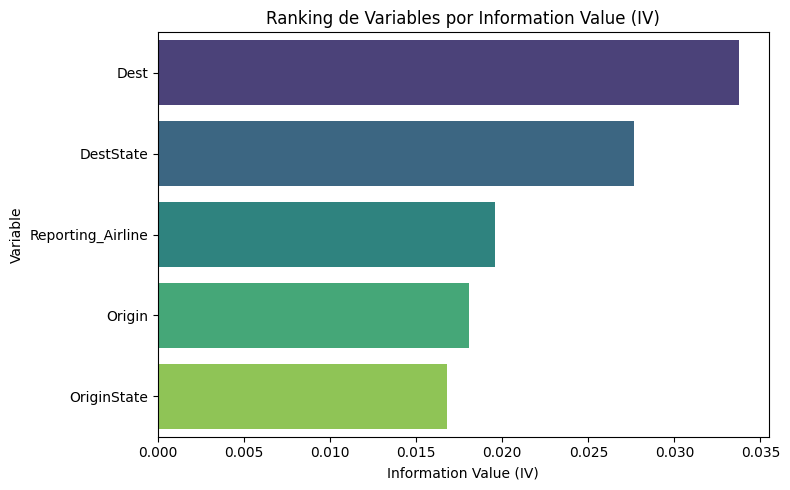

In [ ]:
iv_dict = {}
for col in cat_cols:
    _, iv = calculate_woe_iv(df_balanced, col, 'is_delay')
    iv_dict[col] = iv

# Convertir a DataFrame ordenado
iv_df = pd.DataFrame.from_dict(iv_dict, orient='index', columns=['IV']).sort_values(by='IV', ascending=False)

# Graficar
plt.figure(figsize=(8,5))
sns.barplot(x=iv_df['IV'], y=iv_df.index, palette='viridis')
plt.title("Ranking de Variables por Information Value (IV)")
plt.xlabel("Information Value (IV)")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

### Conclusiones: 
#### Tras aplicar los tres métodos de selección de variables: heatmap de correlación, importancia por coeficientes e Information Value (IV) con WoE. Se concluye que las variables más influyentes para predecir retrasos son aquellas relacionadas con el tiempo del vuelo, como CRSDepTime, Month y DayOfWeek, así como ciertas variables categóricas específicas como Dest, DestState y Reporting_Airline, que si bien tienen IVs individuales bajos, muestran alta relevancia en sus versiones codificadas (dummies) dentro del modelo. Estas diferencias reflejan que algunas variables pueden tener bajo valor predictivo general, pero gran impacto cuando se combinan con otras o se descomponen. Por tanto, se recomienda conservar las variables temporales y aquellas dummies con coeficientes elevados, y descartar aquellas con IV muy bajos y sin peso significativo en el modelo.